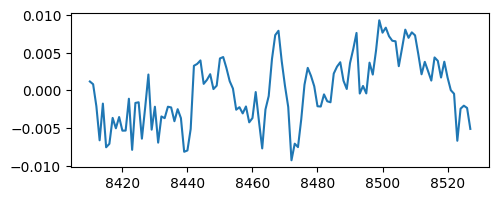

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime
import os

import warnings
data  = pd.read_csv('smhi-opendata_8_40_181970_20241206_130415.csv', sep=';')

#data['Datum'] = pd.to_datetime(data['Datum'])

mask = (data['Datum'] >= '2020-11-01') & (data['Datum'] <= '2021-02-26')
data = data.loc[mask]

dir = "gps_data/GRE/"

data['gps_z'] = np.nan



for row in data.itertuples():
    try:
        file = open(dir + str(row[1]) + "_10ONSA.stacov", 'r')
        file_data = file.readlines()
        coords = file_data[3].split()
        #print(row[0])
        #print(row[1])
        #print(float(coords[4]))
        #data.loc['gps_z'][row[0]] = float(coords[4])
        data.at[row[0], 'gps_z'] = float(coords[4])
        file.close()
    except:
        continue

    #print(type(coords[4]))
    



#pd.to_datetime(data['Datum'])

#cross = np.correlate(data['gps_z'], data['Snödjup'])
mean = data['gps_z'].mean()
fig, ax = plt.subplots(figsize=(5.4, 2),)
#datums = data['Datum']
#datums = pd.to_datetime(np.datetime64['ns'])
#
plt.plot(data['gps_z']-mean)    